In [368]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [369]:
df=pd.read_csv('Linear Regression Sale Prediction.csv')

In [370]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [372]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [373]:
df.isna().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [374]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [375]:
df['Item_Weight'].mean()

12.857645184136183

In [376]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [377]:
df.isna().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                   0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [378]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [379]:
df['Outlet_Size'].mode()

0    Medium
dtype: object

In [380]:
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [381]:
df.isna().sum()/len(df)*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [382]:
num_col=df.select_dtypes(include=['int','float'])
num_col

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.300,0.016047,249.8092,3735.1380
1,5.920,0.019278,48.2692,443.4228
2,17.500,0.016760,141.6180,2097.2700
3,19.200,0.000000,182.0950,732.3800
4,8.930,0.000000,53.8614,994.7052
...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834
8519,8.380,0.046982,108.1570,549.2850
8520,10.600,0.035186,85.1224,1193.1136
8521,7.210,0.145221,103.1332,1845.5976


In [383]:
cat_col=df.select_dtypes(include='O')
cat_col

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [384]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [385]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('low fat','Low Fat')

In [386]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('LF','Low Fat')

In [387]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg','Regular')

In [388]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [389]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [390]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [391]:
df['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [392]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [393]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [394]:
#Bivariate plot

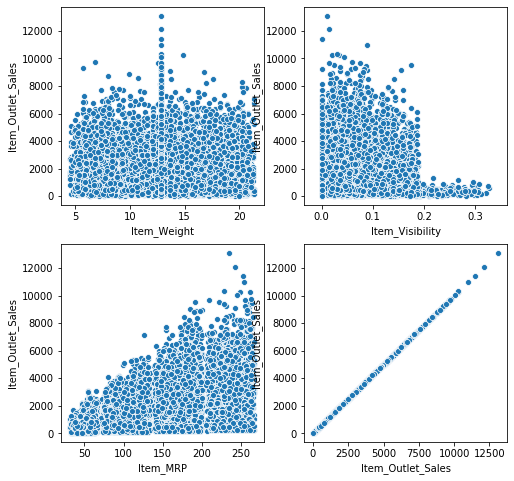

In [395]:
plt.figure(figsize=(8,8))
count=1
for i in num_col:
    plt.subplot(2,2,count)
    sns.scatterplot(x=i,y='Item_Outlet_Sales',data=df)
    count+=1

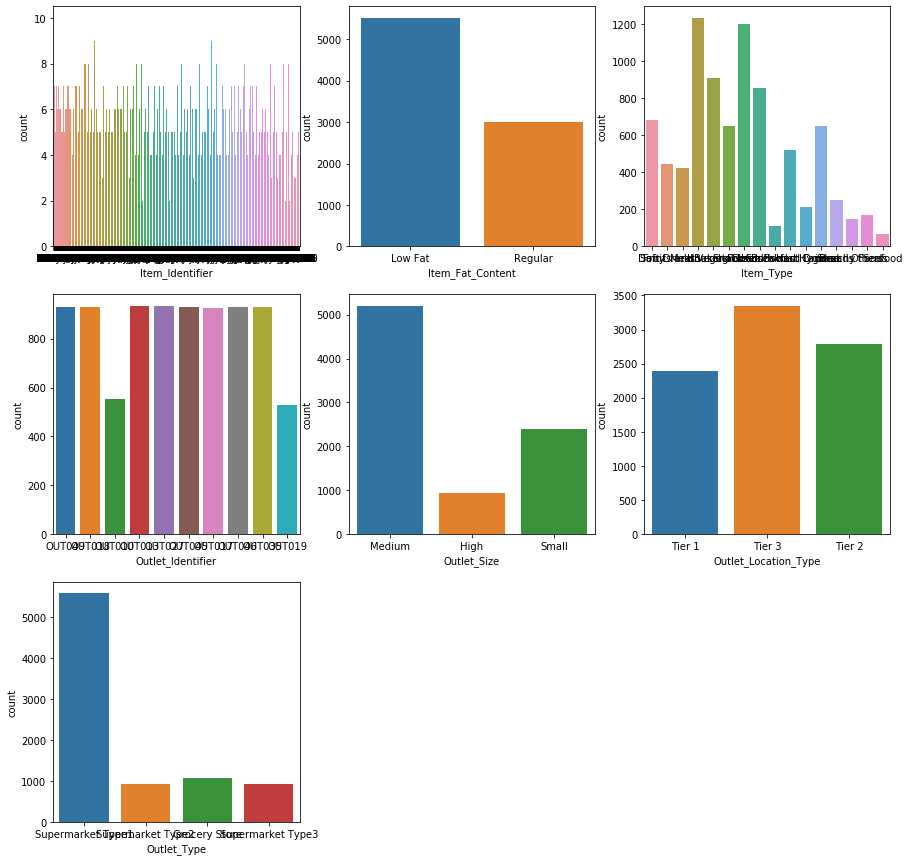

In [396]:
plt.figure(figsize=(15,15))
count=1
for i in cat_col:
    plt.subplot(3,3,count)
    sns.countplot(df[i])
    count+=1   
plt.show()    

In [397]:
num_col

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.300,0.016047,249.8092,3735.1380
1,5.920,0.019278,48.2692,443.4228
2,17.500,0.016760,141.6180,2097.2700
3,19.200,0.000000,182.0950,732.3800
4,8.930,0.000000,53.8614,994.7052
...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834
8519,8.380,0.046982,108.1570,549.2850
8520,10.600,0.035186,85.1224,1193.1136
8521,7.210,0.145221,103.1332,1845.5976


In [398]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


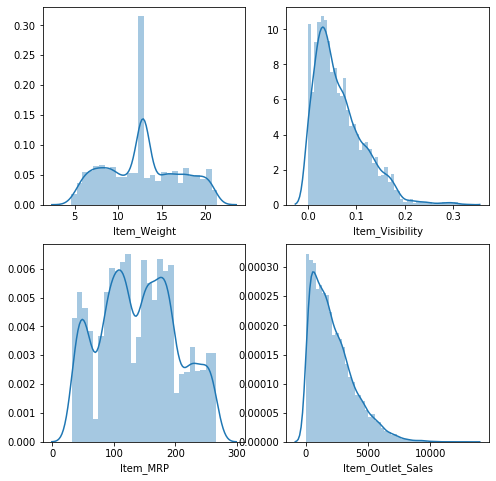

In [399]:
plt.figure(figsize=(8,8))
count=1
for i in num_col:
    plt.subplot(2,2,count)
    sns.distplot(df[i])
    count+=1
    


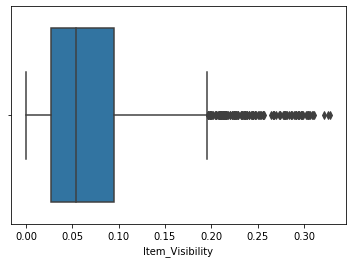

In [400]:
sns.boxplot(df['Item_Visibility'])

In [401]:
df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [402]:
df['Item_Visibility'].mean()

0.06613202877895127

In [403]:
df['Item_Visibility'].median()

0.05393093400000001

In [404]:
#df['Item_Visibility']=df['Item_Visibility'].replace(0.000000,df['Item_Visibility'].median())

In [405]:
df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64

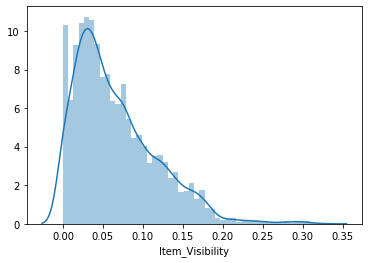

In [406]:
sns.distplot(df['Item_Visibility'])

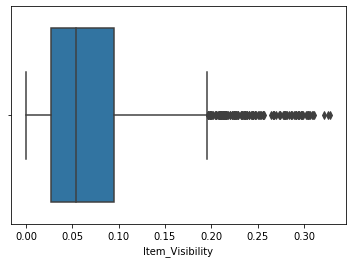

In [407]:
sns.boxplot(df['Item_Visibility'])

In [408]:
df[df['Item_Visibility']>0.190]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
49,FDS02,12.857645,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
65,FDC46,17.700000,Low Fat,0.195068,Snack Foods,185.4266,OUT010,1998,Medium,Tier 3,Grocery Store,184.4266
83,NCL18,12.857645,Low Fat,0.293418,Household,194.6136,OUT019,1985,Small,Tier 1,Grocery Store,583.2408
108,DRE60,12.857645,Low Fat,0.278974,Soft Drinks,225.3720,OUT019,1985,Small,Tier 1,Grocery Store,679.1160
174,FDI32,17.700000,Low Fat,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,Medium,Tier 3,Grocery Store,345.5502
...,...,...,...,...,...,...,...,...,...,...,...,...
8292,FDF56,12.857645,Regular,0.209163,Fruits and Vegetables,179.1976,OUT019,1985,Small,Tier 1,Grocery Store,543.2928
8345,FDY28,12.857645,Regular,0.266397,Frozen Foods,215.6218,OUT019,1985,Small,Tier 1,Grocery Store,641.1654
8371,DRA59,8.270000,Regular,0.214125,Soft Drinks,183.9924,OUT010,1998,Medium,Tier 3,Grocery Store,185.0924
8432,FDI16,14.000000,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,Medium,Tier 3,Grocery Store,159.7920


In [409]:
df.shape

(8523, 12)

In [410]:
df=df[df['Item_Visibility']<0.190]

In [411]:
df.shape

(8363, 12)

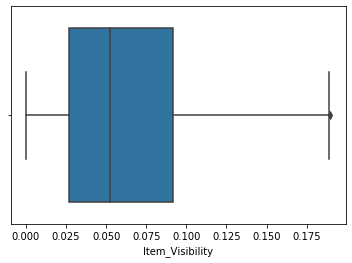

In [412]:
sns.boxplot(df['Item_Visibility'])

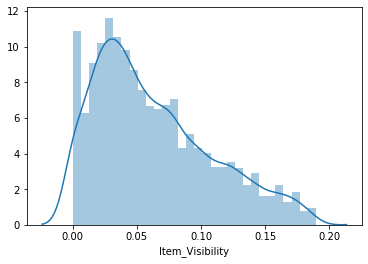

In [413]:
sns.distplot(df['Item_Visibility'])

In [414]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [415]:
#print(np.log(1+df['Item_Outlet_Sales']))

In [416]:
#df['Item_Visibility']=df['Item_Visibility']

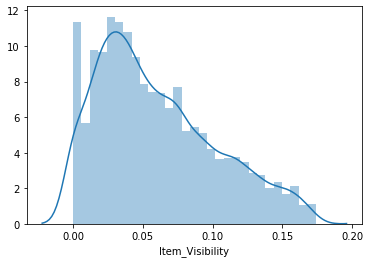

In [417]:
sns.distplot(np.log(1+df['Item_Visibility']))

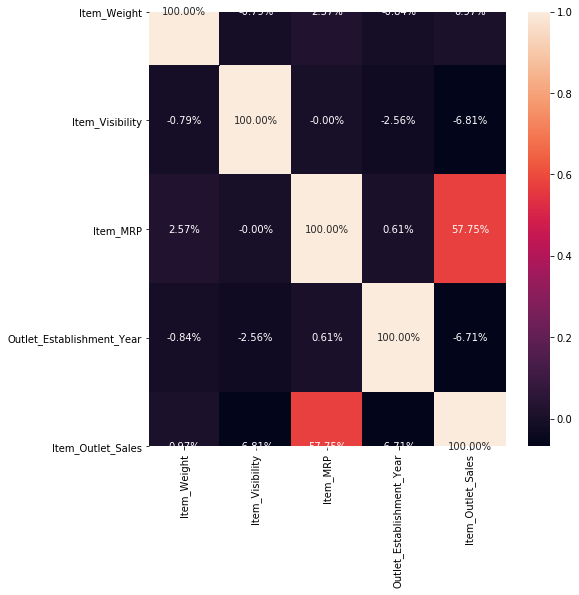

In [418]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,fmt='0.2%')

In [419]:
from sklearn.preprocessing import LabelEncoder

In [420]:
le=LabelEncoder()

In [421]:
for i in cat_col:
    df[i]=le.fit_transform(df[i])

In [422]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1120,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1296,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,896,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1356,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [423]:
X=df.iloc[:,:-1]

In [424]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1120,19.200,1,0.000000,6,182.0950,0,1998,1,2,0
4,1296,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,896,8.380,1,0.046982,0,108.1570,7,2002,1,1,1
8520,1356,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [425]:
y=df.iloc[:,-1]

In [426]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8363, dtype: float64

In [427]:
from sklearn.model_selection import train_test_split

In [428]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [429]:
X_train.shape

(6690, 11)

In [430]:
X_test.shape

(1673, 11)

In [431]:
y_train.shape

(6690,)

In [432]:
y_train.size

6690

In [433]:
from sklearn.linear_model import LinearRegression

In [434]:
reg=LinearRegression()

In [435]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [436]:
y_train_pred=reg.predict(X_train)

In [437]:
y_test_pred=reg.predict(X_test)

In [438]:
from sklearn.metrics import r2_score,mean_squared_error

In [439]:
print('Train Data')
print({'R2_Score':round(r2_score(y_train,y_train_pred),2)})
print({'RMSE':round(np.sqrt(mean_squared_error(y_train,y_train_pred)),2)})
print('Test Data')
print({'R2_Score':round(r2_score(y_test,y_test_pred),2)})
print({'RMSE':round(np.sqrt(mean_squared_error(y_test,y_test_pred)),2)})

Train Data
{'R2_Score': 0.5}
{'RMSE': 1207.19}
Test Data
{'R2_Score': 0.5}
{'RMSE': 1162.41}


#Polynomial Regression

In [440]:
from sklearn.preprocessing import PolynomialFeatures

In [441]:
poly_features=PolynomialFeatures(degree=3)
X_poly=poly_features.fit_transform(X)
lr_poly=LinearRegression()
lr_poly.fit(X_poly,y)
y_pred=lr_poly.predict(X_poly)

In [442]:
r2=r2_score(y,y_pred)
rmse=np.sqrt(mean_squared_error(y,y_pred))
print('R2 score:{}  |  RMSE:{}'.format(round(r2,2),round(rmse,2)))

R2 score:0.61  |  RMSE:1066.84


In [447]:
from sklearn.linear_model import Ridge,Lasso

In [484]:
reg=Ridge(alpha=1,max_iter=10,random_state=1,tol=1)

In [485]:
reg.fit(X_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=10, normalize=False,
      random_state=1, solver='auto', tol=1)

In [486]:
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [487]:
r2=r2_score(y_train,y_pred_train)
rmse=np.sqrt(mean_squared_error(y_train,y_pred_train))
print('R2 score:{}  |  RMSE:{}'.format(round(r2,2),round(rmse,2)))

R2 score:0.5  |  RMSE:1207.19
